<a href="https://colab.research.google.com/github/Hritik004/Machine-Learning/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
251,37,52000,0
399,49,36000,1
198,26,80000,0
253,37,146000,1
66,24,19000,0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape

(280, 2)

#Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


#Effect of Scaling

<function matplotlib.pyplot.show(close=None, block=None)>

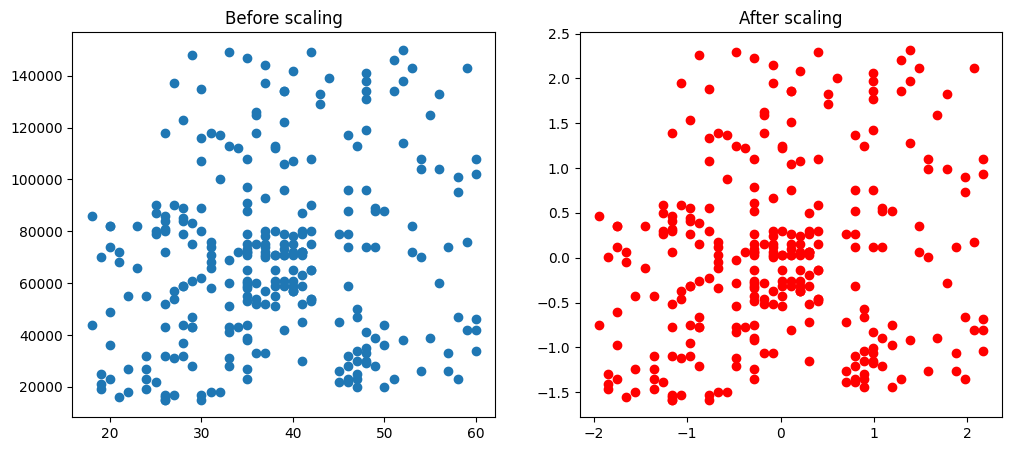

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")
plt.show  ()

#Why scaling is important ?

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_scaled=LogisticRegression()
model.fit(x_train,y_train)
model_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred=model.predict(x_test)
y_pred_scaled=model_scaled.predict(x_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
